In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [56]:
dbColumnsLine=['Price','Position','Squad','Appearances','PPG','Goals','Assists','Own Goals','Subs In','Subs Out','Yellows','Second Yellows','Red','Penalty Goals','Minutes per goal','Minutes played']
dbColumnsKeeper=['Price','Position','Squad','Appearances','PPG','Goals','Own Goals','Subs In','Subs Out','Yellows','Second Yellows','Red','Goals Conceeded','Clean Sheets','Minutes Played']

In [57]:
page = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1'
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
tree=requests.get(page, headers=headers)

In [58]:
soup=BeautifulSoup(tree.content,'html.parser')

In [59]:
links = soup.find_all("a")
teamsPrem= ['Manchester City', 'Liverpool FC', 'Tottenham Hotspur', 'Chelsea FC', 'Manchester United', 'Arsenal FC', 'Everton FC', 'Leicester City', 'West Ham United', 'AFC Bournemouth', 'Wolverhampton Wanderers', 'Newcastle United', 'Southampton FC', 'Crystal Palace', 'Watford', 'Brighton & Hove Albion', 'Burnley FC', 'Aston Villa', 'Norwich City', 'Sheffield United']
jaFoi=[]
linksTeams=[]

for link in links:
    for a in teamsPrem:
        if a not in jaFoi:
            if a in link.text:
                linksTeams.append(link.attrs['href'])
                jaFoi.append(a)          

print(linksTeams)

['/manchester-united/startseite/verein/985', '/manchester-city/startseite/verein/281', '/fc-liverpool/startseite/verein/31/saison_id/2019', '/tottenham-hotspur/startseite/verein/148/saison_id/2019', '/fc-chelsea/startseite/verein/631/saison_id/2019', '/fc-arsenal/startseite/verein/11/saison_id/2019', '/fc-everton/startseite/verein/29/saison_id/2019', '/leicester-city/startseite/verein/1003/saison_id/2019', '/west-ham-united/startseite/verein/379/saison_id/2019', '/afc-bournemouth/startseite/verein/989/saison_id/2019', '/wolverhampton-wanderers/startseite/verein/543/saison_id/2019', '/newcastle-united/startseite/verein/762/saison_id/2019', '/fc-southampton/startseite/verein/180/saison_id/2019', '/crystal-palace/startseite/verein/873/saison_id/2019', '/fc-watford/startseite/verein/1010/saison_id/2019', '/brighton-amp-hove-albion/startseite/verein/1237/saison_id/2019', '/fc-burnley/startseite/verein/1132/saison_id/2019', '/aston-villa/startseite/verein/405/saison_id/2019', '/norwich-city/

In [60]:
listaNula=[[]]
listaNulaGK=[[]]

In [110]:
page='https://www.transfermarkt.com/sheffield-united/startseite/verein/350/saison_id/2019'
tree=requests.get(page, headers=headers)
soup=BeautifulSoup(tree.content,'html.parser')

test = soup.find_all('optgroup')
listExclude=[]
listPlayers=[]
linksPlayers=[]
jaFoiTmb=[]

i=0
while i<101:
    listExclude.append('({}) '.format(i))
    i+=1

for a in test:
    for b in a:
        for c in b:
            for t in listExclude:
                if t in c:
                    listPlayers.append(c.replace(t, ''))

play = soup.find_all('a')

for link in play:
    for a in listPlayers:
        if a not in jaFoiTmb:
            if a in link.text:
                linksPlayers.append(link.attrs['href'])
                jaFoiTmb.append(a)

aaa=[]
for a in linksPlayers:
    i=a.split('/')
    for j in i:
        aaa.append(j)

playerNumber=[]

u=0
for a in aaa:
    u+=1
    if u%5==0:
        playerNumber.append(a)

for a in playerNumber:
    page='https://www.transfermarkt.com/player/leistungsdatendetails/spieler/{}/saison//verein/0/liga/0/wettbewerb//pos/0/trainer_id/0/plus/1'.format(a)    

    tree=requests.get(page, headers=headers)
    soup=BeautifulSoup(tree.content,'html.parser')

    priceFinder=soup.find_all('a')
    priceText=''
    price=''

    for a in priceFinder:
        if '€' in a.text:
            priceText=a.text.replace(',','.')

    priceList=priceText.split(' ')


    if 'mil.' in priceList:
        price=float(priceList[0])*1000000
    elif 'K' in priceList:
        price=float(priceList[0])*1000

    positions=['Goalkeeper','Centre-Back','Right-Back','Left-Back','Defensive Midfield','Central Midfield','Left Midfield','Right Midfield','Attacking Midfield','Left Winger','Right Winger','Centre-Forward','Second Striker']
    positFinder=soup.find_all('span')

    for a in positFinder:
        for i in positions:
            if i in a.text:
                position=i

    totStats=soup.find_all('tfoot')
    randList=[]
    listaStats=[price,position]

    for stat in totStats:
        for a in stat:
            for b in a:
                for c in b:
                    randList.append(c)
    for a in randList:
        if a[0]=='1' or a[0]=='0' or a[0]=='2' or a[0]=='3' or a[0]=='4' or a[0]=='5' or a[0]=='6' or a[0]=='7' or a[0]=='8' or a[0]=='9':
            listaStats.append(a)
        elif a[0]=='-':
            listaStats.append('0')
    if position=='Goalkeeper':
        listaNulaGK.append(listaStats)
    else:
        listaNula.append(listaStats)


In [124]:
print(len(listaNula))

456


In [136]:
dfLinha=pd.DataFrame(listaNula,columns=dbColumnsLine)
dfLinha.head()

,Price,Position,Squad,Appearances,PPG,Goals,Assists,Own Goals,Subs In,Subs Out,Yellows,Second Yellows,Red,Penalty Goals,Minutes per goal,Minutes played
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,7e+07,Centre-Back,384,348,"1,54",21,19,2,18,9,67,0,4,0,1.435',30.132'
2,3.5e+07,Centre-Back,341,291,"1,78",6,6,2,14,13,36,1,2,0,4.123',24.740'
3,2.5e+07,Centre-Back,195,148,"1,80",2,1,1,12,18,34,4,2,0,5.839',11.678'
4,1.5e+07,Centre-Back,319,275,"1,84",5,11,5,32,30,34,0,0,0,4.274',21.370'


In [113]:
dfGK=pd.DataFrame(listaNulaGK,columns=dbColumnsKeeper)
dfGK.head()

,Price,Position,Squad,Appearances,PPG,Goals,Own Goals,Subs In,Subs Out,Yellows,Second Yellows,Red,Goals Conceeded,Clean Sheets,Minutes Played
0,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,65000000.0,Goalkeeper,552,490,"1,74",0,1,1,2,7,0,0,534,161,44.220'
2,3500000.0,Goalkeeper,540,255,"1,79",0,0,5,11,13,0,2,234,112,22.608'
3,750000.0,Goalkeeper,738,508,"1,34",0,2,7,2,20,0,0,670,133,45.589'
4,65000000.0,Goalkeeper,552,490,"1,74",0,1,1,2,7,0,0,534,161,44.220'


In [126]:
dfLinha.to_csv('/Users/EduardoGoncalves/Desktop/dataLinha.csv')

In [127]:
dfGK.to_csv('/Users/EduardoGoncalves/Desktop/dataGK.csv')

In [122]:
pwd

'/Users/EduardoGoncalves'

In [143]:
#dfLinha=dfLinha.drop(0)
#dfGK=dfGK.drop(0)

dfGK_E=dfGK
dfLinha_E=dfLinha

In [144]:
dfGK_E=dfGK_E.astype(str)
dfLinha_E=dfLinha_E.astype(str)

In [145]:
import matplotlib.pyplot as plt

In [168]:
listaPPG_GK=[]
for a in dfGK_E.PPG:
    a=a.replace(',','.')
    listaPPG_GK.append(a)   
dfGK_E['PPG']=listaPPG_GK

listaPPG_Linha=[]
for a in dfLinha_E.PPG:
    a=a.replace(',','.')
    listaPPG_Linha.append(a)   
dfLinha_E['PPG']=listaPPG_Linha

,Price,Position,Squad,Appearances,PPG,Goals,Own Goals,Subs In,Subs Out,Yellows,Second Yellows,Red,Goals Conceeded,Clean Sheets,Minutes Played
1,65000000.0,Goalkeeper,552,490.0,1.74,0.0,1,1,2,7,0,0,534,161,44.220'
2,3500000.0,Goalkeeper,540,255.0,1.79,0.0,0,5,11,13,0,2,234,112,22.608'
3,750000.0,Goalkeeper,738,508.0,1.34,0.0,2,7,2,20,0,0,670,133,45.589'
4,65000000.0,Goalkeeper,552,490.0,1.74,0.0,1,1,2,7,0,0,534,161,44.220'
5,3500000.0,Goalkeeper,540,255.0,1.79,0.0,0,5,11,13,0,2,234,112,22.608'


In [179]:
dfGK_E.Price=dfGK_E.Price.astype(float)
dfGK_E.Appearances=dfGK_E.Appearances.astype(float)
dfGK_E.Goals=dfGK_E.Goals.astype(float)
dfGK_E.PPG=dfGK_E.PPG.astype(float)

In [180]:
dfLinha_E.Price=dfLinha_E.Price.astype(float)


ValueError: could not convert string to float: 

In [183]:
dfGK_E.dtypes

Price              float64
Position            object
Squad               object
Appearances        float64
PPG                float64
Goals              float64
Own Goals           object
Subs In             object
Subs Out            object
Yellows             object
Second Yellows      object
Red                 object
Goals Conceeded     object
Clean Sheets        object
Minutes Played      object
dtype: object

In [174]:
xZaga=dfLinha[(dfLinha_E.Position == 'Centre-Back')].Price
yZaga=dfLinha[(dfLinha_E.Position == 'Centre-Back')].PPG

/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

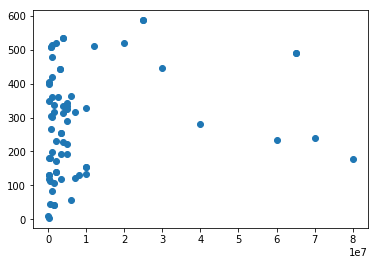

In [184]:
plt.scatter(dfGK_E.Price,dfGK_E.Appearances)